# The sampling theorem explained with numpy

Adapted from https://glowingpython.blogspot.com/2011/09/sampling-theorem-explained-with-numpy.html

The sampling theorem states that a continuous signal $x(t)$ bandlimited to $B$ Hz can be recovered from its samples $x[n] = x(n\;T)$, where $n$ is an integer, if $T$ is greater than or equal to $1/(2B)$ without loss of any information. And we call $2B$ the Nyquist rate.
Sampling at a rate below the Nyquist rate is called undersampling, it leads to the aliasing effect. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1: Define a function with generates a signal containing at least 2 different frequencies

In [4]:
# Signal definition
f = 50;
tmin = -0.4;
tmax = 0.4;
t = np.linspace(tmin, tmax, 500);
x = np.cos(2*np.pi*f*t) + np.sin(2*np.pi*t); # signal sampling


## Task 2: Visualize the time-contionuous signal for a representative window 

Text(0.5, 0, 'combination of 2 different signals')

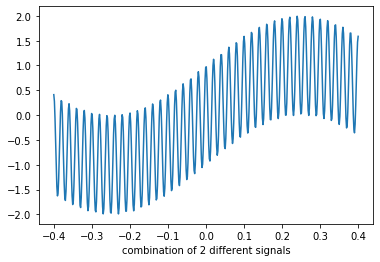

In [6]:
# Example plot for Task 2
plt.plot(t, x)
plt.xlabel('combination of 2 different signals')

## Task 3: Sample the signal by applying the Nyquist theorem and visualize both continous and sampled signal

Text(0.5, 0, 'combination of 2 different signals + local min and max')

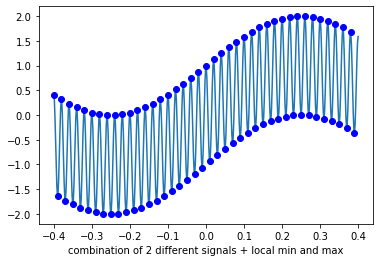

In [10]:
# Example plot for task 3
T = 1/100.0;
nmin = np.ceil(tmin / T);
nmax = np.floor(tmax / T);
n = np.arange(nmin,nmax);
x1 = np.cos(2*np.pi*f*n*T) + np.sin(2*np.pi*n*T);
plt.plot(t,x)
plt.plot(n*T, x1, 'bo')
plt.xlabel('combination of 2 different signals + local min and max')

## Task 4: Sample the signal by violating the Nyquist theorem and visualize both continous and sampled signal

Text(0.5, 0, 'sample of signal violating the Nyquist Theorem')

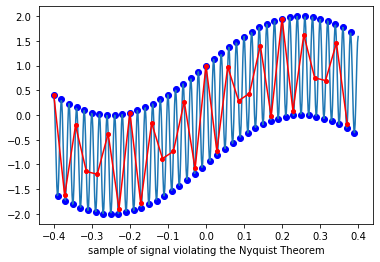

In [12]:
# Example plot for task 4
T1 = 1/100.0;
nmin = np.ceil(tmin / T1);
nmax = np.floor(tmax / T1);
n = np.arange(nmin,nmax);
x1 = np.cos(2*np.pi*f*n*T1) + np.sin(2*np.pi*n*T1);
plt.plot(n*T1, x1, 'bo')

T2 = 1/35.0;
nmin = np.ceil(tmin / T2);
nmax = np.floor(tmax / T2);
n = np.arange(nmin,nmax);
x2 = np.cos(2*np.pi*n*f*T2) + np.sin(2*np.pi*n*T2);
plt.plot(t,x)
plt.plot(n*T2, x2, '-r.',markersize=8)
plt.xlabel('sample of signal violating the Nyquist Theorem')

## Task 5: Reconstruct the original signal from the sampled signals and compare the reconstructed signals to the original signal

Text(0.5, 0, 'reconstructing original signal from sampled signals')

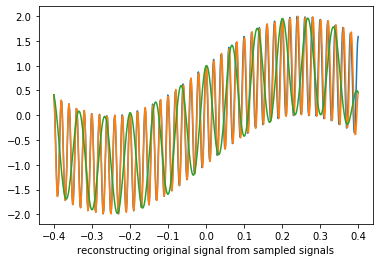

In [16]:
from scipy.signal import resample
f1 = resample(x1,500)
f2 = resample(x2,500)
plt.plot(t,x)
plt.plot(t,f1)
plt.plot(t,f2)
plt.xlabel('reconstructing original signal from sampled signals')

## Task 6: Write a short figure caption to each of your plots